# Description

The purpose of the notebook is to create a standardized way of analyzing datasets with basic machine learning techniques. 

All imports are done under imports. 

The class DataAnalysis is created below with built-in functions for quick analyzing. 

For more comprehensive data analysis, some of the functions can be copied, though one is best of preparing another notebook with more extensive cleaning, feature engineering, hyperparameter tuning, more models and deeper models.

For regression analysis, a vanilla linear, ridge and lasso regressors are trained along with linear, ridge and lasso with polynomial features to detect non-linear features.

_________________________________

# IMPORTS

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data wrangling
import pandas as pd
import numpy as np
import re

#Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting style
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
# Root mean squared error for GridSearchCrossValidate for later
def rmse(ytrue, ypredicted):
        return np.sqrt(mean_squared_error(ytrue, ypredicted))

# CLASS: DataAnalysis

In [7]:
class DataAnalysis:
    '''
    The DataAnalysis class is used for objectives such as: 'Time Series', 'Classification' and 'Regression.' 
    '''
    def __init__(self, df, y, objective):
        self.df = df
        
        
        # Define objective 
        self.objective = objective
        print('The objective of the analysis is: ', objective)
        print('------------------------------------------------------------------------------')
        
        if self.objective.lower() == 'regression':
            print('-----------------------------------------------------------------------------')
            print('The first 5 rows of the dataframe')
            display(df.head())
            print('-----------------------------------------------------------------------------')
            print('Dataframe info\n')
            print(df.info())
            print('-----------------------------------------------------------------------------')
            print('Count, mean, standard deviation and five-number summary')
            display(df.describe())
            print('-----------------------------------------------------------------------------')
            print('Correlation matrix')
            print('This may take a couple of seconds...')
            sns.pairplot(self.df)
            plt.show()
            print('-----------------------------------------------------------------------------')

            # X and y
            self.X = self.df.drop(y, axis = 1)
            self.y = self.df[y]

            # Pred dict and regressors dict for later
            self.predictions = dict()
            self.regressors_dict = dict()
        
    #------------------------------------------------------------------------------------------------------------------------
    # CREATE REGRESSION MODEL
    # Explain it
    def explan_modelling(self):
        print('Step 1: Train-test split')
        print('Data dependent: Scale (Here StandardScaler is used)')
        print('Step 2: Create polynomial features')
        print('Step 3: Regression models')
        print('Step 4: See performance')

    # First, create train-test set 
    def train_test_split(self, test_size):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size)
    
    # Data dependent, scaling
    def scale_standard(self):
        ss = StandardScaler()
        self.X_train_ss = ss.fit_transform(self.X_train)
        self.X_test_ss = ss.fit_transform(self.X_test)
        
    # Second, create polynomial features for non-linear features
    # Creating object of the polynomial features class from sklearn
    def create_poly_features(self, degrees):
        # Instantiating 
        pf = PolynomialFeatures(degree = degrees)

        # Create features 
        self.X_poly_train = pf.fit_transform(self.X_train_ss)
        self.X_poly_test = pf.fit_transform(self.X_test_ss)
            
    
    def create_regressors_and_predict(self, linear_regression = True, ridge_regression = True, lasso_regression = True,
                                     alpha_ridge = 14000, max_iter=100000, alpha_lasso = 1e-06):
        '''
        Specify if either linear, ridge or lasso regression is not wished.
        '''
        
        
        if linear_regression == True:
            # LINEAR REGRESSION
            linear = LinearRegression()
            # Fitting to linear regression 
            self.linear = linear.fit(self.X_train, self.y_train)
            # Predicting 
            self.y_pred_linear = self.linear.predict(self.X_test)
            print('The fitted linear regressions model is assigned to self.linear, and predictions are self.y_pred_linear')
            # For later
            self.predictions['linear'] = self.y_pred_linear
            self.regressors_dict['linear'] = self.linear
    
        if ridge_regression == True:
            # RIDGE REGRESSION
            ridge = Ridge(alpha=alpha_ridge, max_iter=max_iter)
            # Fitting to ridge regression
            self.ridge = ridge.fit(self.X_train, self.y_train)
            # Predicting 
            self. y_pred_ridge = self.ridge.predict(self.X_test)
            print('The fitted ridge regressions model is assigned to self.ridge, and predictions are self.y_pred_ridge')
            # For later
            self.predictions['ridge'] = self.y_pred_ridge
            self.regressors_dict['ridge'] = self.ridge

        if lasso_regression == True:
            # LASSO REGRESSION 
            lasso = Lasso(alpha=alpha_lasso)
            # Fitting to lasso regression
            self.lasso = lasso.fit(self.X_train, self.y_train)
            # Predicting 
            self.y_pred_lasso = self.lasso.predict(self.X_test)
            print('The fitted lasso regressions model is assigned to self.lasso, and predictions are self.y_pred_lasso')
            # For later
            self.predictions['lasso'] = self.y_pred_lasso
            self.regressors_dict['lasso'] = self.lasso
            
    def create_poly_regressors_and_predict(self, linear_regression_poly = True, ridge_regression_poly = True,
                                           lasso_regression_poly = True, 
                                           max_iter=10000000, find_parameters_automatically = True):
        # SET TO FIND PARAMETERS AUTOMATICALLY 
        '''
        Specify if either linear, ridge or lasso regression is not wished.
        '''
        if linear_regression_poly == True:
            # LINEAR REGRESSION with polynomial features
            linear_poly = LinearRegression()
            # Fitting to linear regression
            self.linear_poly = linear_poly.fit(self.X_poly_train, self.y_train)
            # Predicting 
            self.y_pred_linear_poly = self.linear_poly.predict(self.X_poly_test)
            print('The fitted linear regressions model is assigned to self.linear_poly, and predictions are self.y_pred_linear_poly')
            # Later
            self.predictions['linear poly'] = self.y_pred_linear_poly
            self.regressors_dict['linear poly'] = self.linear_poly
    
        if ridge_regression_poly == True:
            if find_parameters_automatically == True:
                # Alphas to try
                alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80, 100, 200, 5000, 10000, 13000, 14000, 15000, 16000, 17500, 20000] 
                # Create ridgecv object
                ridgeCV = RidgeCV(alphas=alphas).fit(self.X_poly_train, self.y_train)
                # Use the rmse function to calculate
                ridgeCV_rmse = rmse(self.y_test, ridgeCV.predict(self.X_poly_test))
                self.alpha_ridge_poly = ridgeCV.alpha_
                
                
            # RIDGE REGRESSION with polynomial features
            self.ridge_poly = Ridge(alpha=self.alpha_ridge_poly, max_iter=max_iter)
            # Fitting to ridge regression
            self.ridge_poly = self.ridge_poly.fit(self.X_poly_train, self.y_train)
            # Predicting 
            self.y_pred_ridge_poly = self.ridge_poly.predict(self.X_poly_test)
            print('The fitted ridge regressions model is assigned to self.ridge_poly, and predictions are self.y_pred_ridge_poly')
            # Later
            self.predictions['ridge poly'] = self.y_pred_ridge_poly
            self.regressors_dict['ridge poly'] = self.ridge_poly
            
            
        if lasso_regression_poly == True:
            if find_parameters_automatically == True:
                # Define alphas to try out 
                alphas2 = np.array([1e-6, 5e-5, 1e-5, 5e-5, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])
                # Create lassocv object
                lassoCV = LassoCV(alphas=alphas2).fit(self.X_poly_train, self.y_train)
                # Use the rmse function to calculate
                lassoCV_rmse = rmse(self.y_test, lassoCV.predict(self.X_poly_test))
                self.alpha_lasso_poly = lassoCV.alpha_
                
                
            # LASSO REGRESSION with polynomial features
            lasso_poly = Lasso(alpha=self.alpha_lasso_poly)
            # Fitting to lasso regression
            self.lasso_poly = lasso_poly.fit(self.X_poly_train, self.y_train)
            # Predicting 
            self.y_pred_lasso_poly = self.lasso_poly.predict(self.X_poly_test)
            print('The fitted lasso regressions model is assigned to self.lasso_poly, and predictions are self.y_pred_lasso_poly')
            # Later 
            self.predictions['lasso poly'] = self.y_pred_lasso_poly
            self.regressors_dict['lasso poly'] = self.lasso_poly
        
        
    def see_performance(self):
        # R2 scores 
        for regressor in self.predictions.keys():
            print(f'R2 score for {regressor}:', round(r2_score(self.y_test, self.predictions[regressor]),6))
        
        # Plotting
        fig, axes = plt.subplots(len(self.predictions.keys())+1,1, figsize = (15,len(self.predictions.keys())*10))
        axes[0].scatter(self.y_test, self.y_test, label = 'Test set')
        axes[0].set_title('Test set')
        axes[0].legend(loc='upper left')
        
            # Look at regressors 
        for i, regressor in enumerate(self.predictions.keys()):
            r2 = round(r2_score(self.y_test, self.predictions[regressor]),6)
            axes[i+1].scatter(self.y_test, self.predictions[regressor], label=regressor+' R2 score: '+str(r2))
            axes[i+1].set_title(regressor)
            axes[i+1].legend(loc='upper left')
    
    def check_coefficients(self):
        for regressor in self.regressors_dict.keys():
            #print(f'Coefficients for {regressor}:', self.regressors_dict[regressor].coef_.ravel())
            
            #Plot
            print(f'Coefficients for {regressor}')
            rang = np.arange(len(self.regressors_dict[regressor].coef_.ravel()))
            plt.figure(figsize=(15,3))
            plt.bar(rang, self.regressors_dict[regressor].coef_.ravel())
            plt.show()
    #------------------------------------------------------------------------------------------------------------------------

# 1. DATA AND EDA SETTING PARAMETERS AND INITIALIZING CLASS

In [8]:
df = pd.read_excel('data/Concrete_Data.xls')

# For ease of working with
# Renaming
for column in df.columns:
    regex = r"[a-zA-Z ]+"
    new_name = re.findall(regex, column)[0]
    df = df.rename(columns={column:new_name})
    
# Set X and y
y = 'Concrete compressive strength'

The objective of the analysis is:  Regression
------------------------------------------------------------------------------
-----------------------------------------------------------------------------
The first 5 rows of the dataframe


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


-----------------------------------------------------------------------------
Dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
-----------------------------------------------------------------------------
Count,

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


-----------------------------------------------------------------------------
Correlation matrix
This may take a couple of seconds...


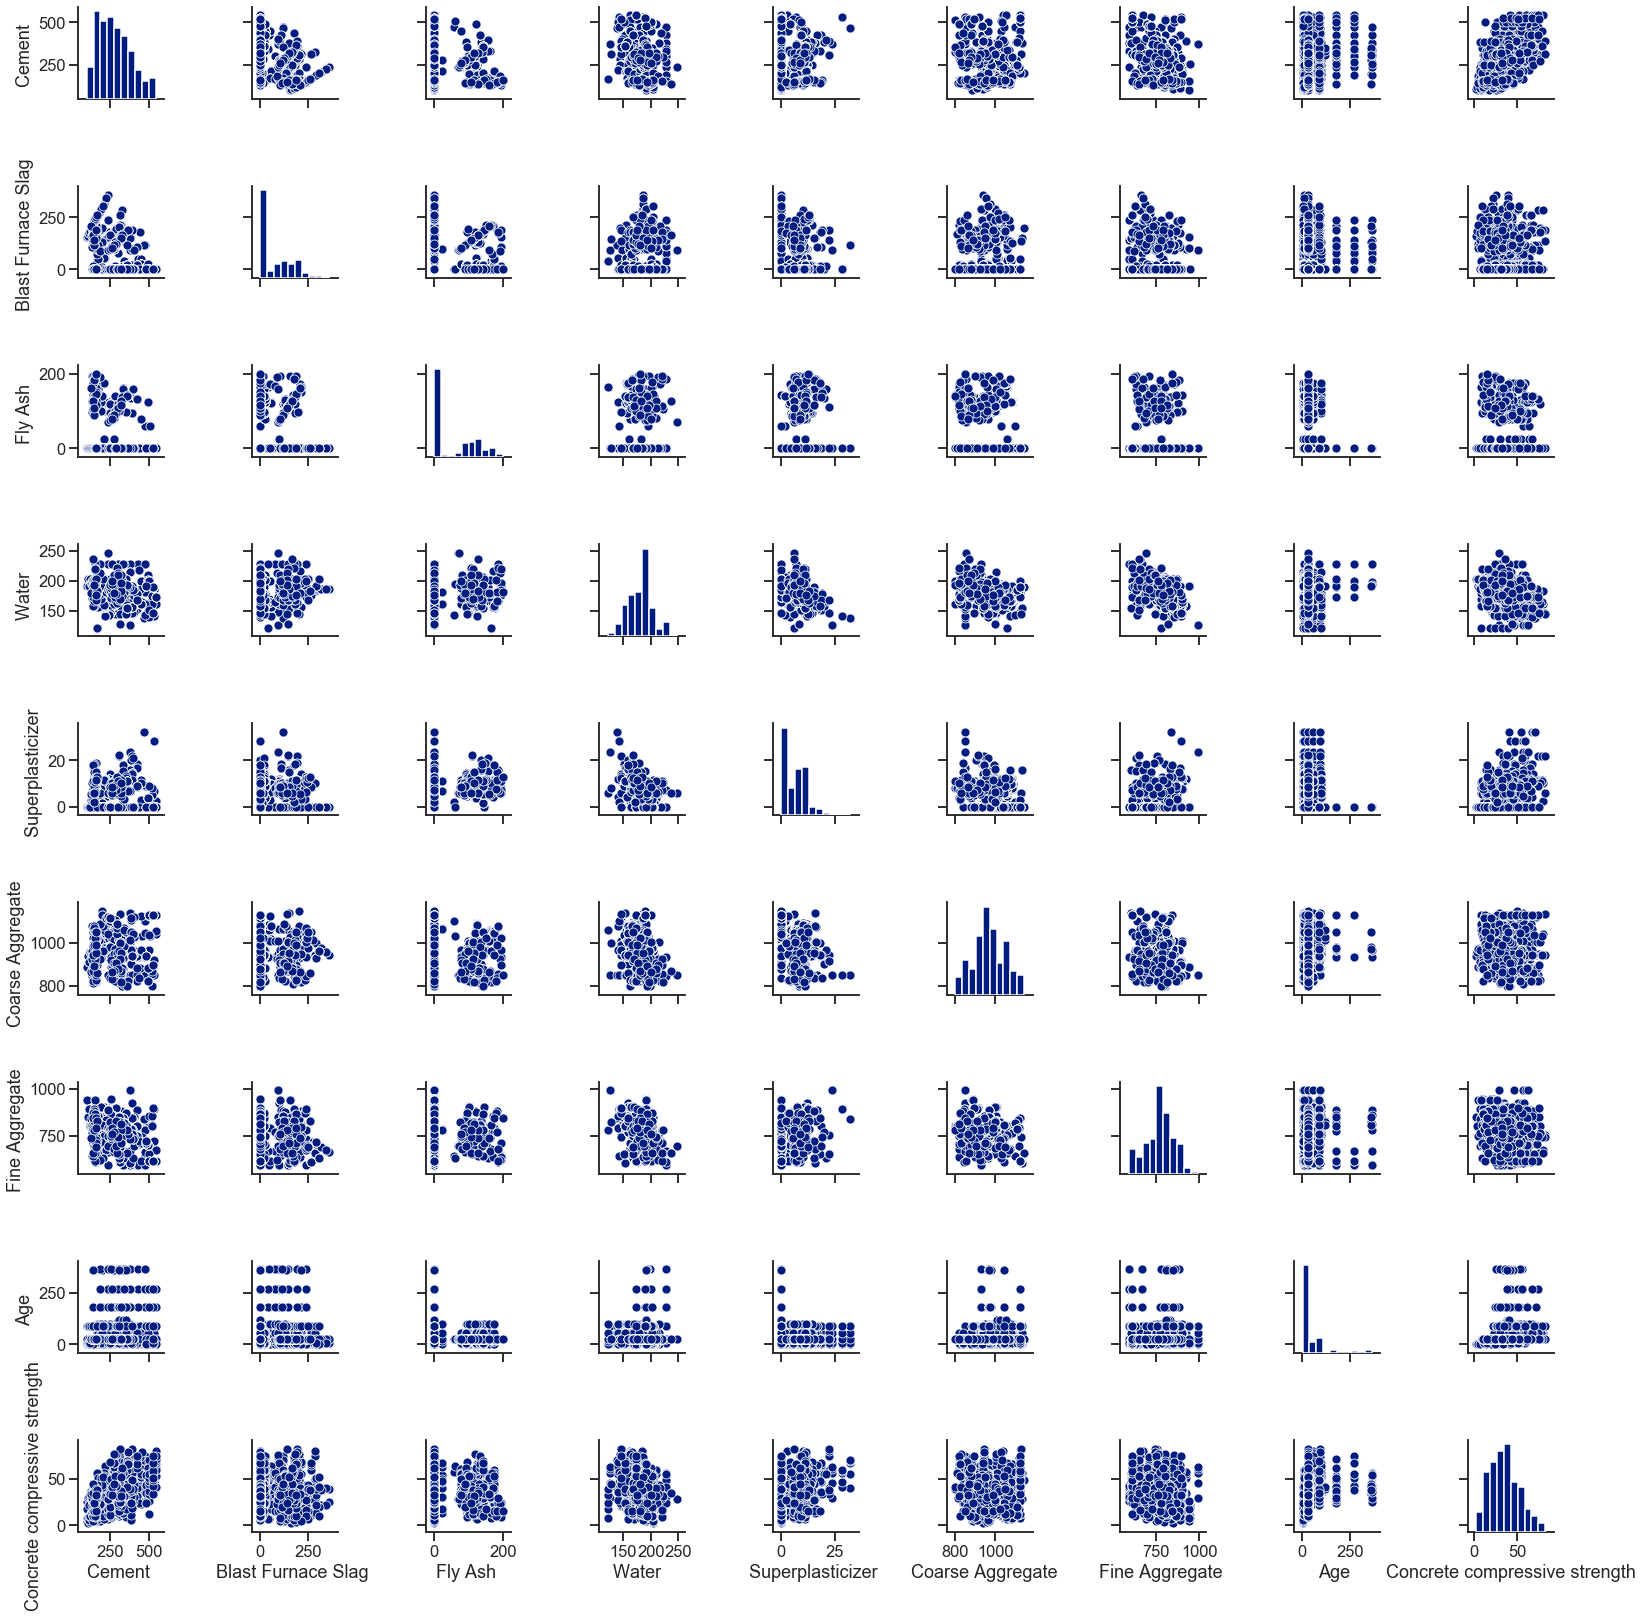

-----------------------------------------------------------------------------


In [9]:
model = DataAnalysis(df, y, 'Regression')

# 2. DATA ENGINEERING

### Train-test split

In [10]:
# Train test split
model.train_test_split(0.3)

### Scale (see the big difference from 'Coarse Aggregate' to Superplasticizer' 

In [11]:
# Scale
model.scale_standard()

### Poly features

In [12]:
model.create_poly_features(degrees = 2)

# 3. MODEL

### Regressors

In [13]:
model.create_regressors_and_predict()

The fitted linear regressions model is assigned to self.linear, and predictions are self.y_pred_linear
The fitted ridge regressions model is assigned to self.ridge, and predictions are self.y_pred_ridge
The fitted lasso regressions model is assigned to self.lasso, and predictions are self.y_pred_lasso


In [14]:
model.create_poly_regressors_and_predict()

The fitted linear regressions model is assigned to self.linear_poly, and predictions are self.y_pred_linear_poly
The fitted ridge regressions model is assigned to self.ridge_poly, and predictions are self.y_pred_ridge_poly
The fitted lasso regressions model is assigned to self.lasso_poly, and predictions are self.y_pred_lasso_poly


### Performance

In [15]:
model.predictions.keys()

dict_keys(['linear', 'ridge', 'lasso', 'linear poly', 'ridge poly', 'lasso poly'])

R2 score for linear: 0.639455
R2 score for ridge: 0.637989
R2 score for lasso: 0.639455
R2 score for linear poly: 0.808654
R2 score for ridge poly: 0.808208
R2 score for lasso poly: 0.807146


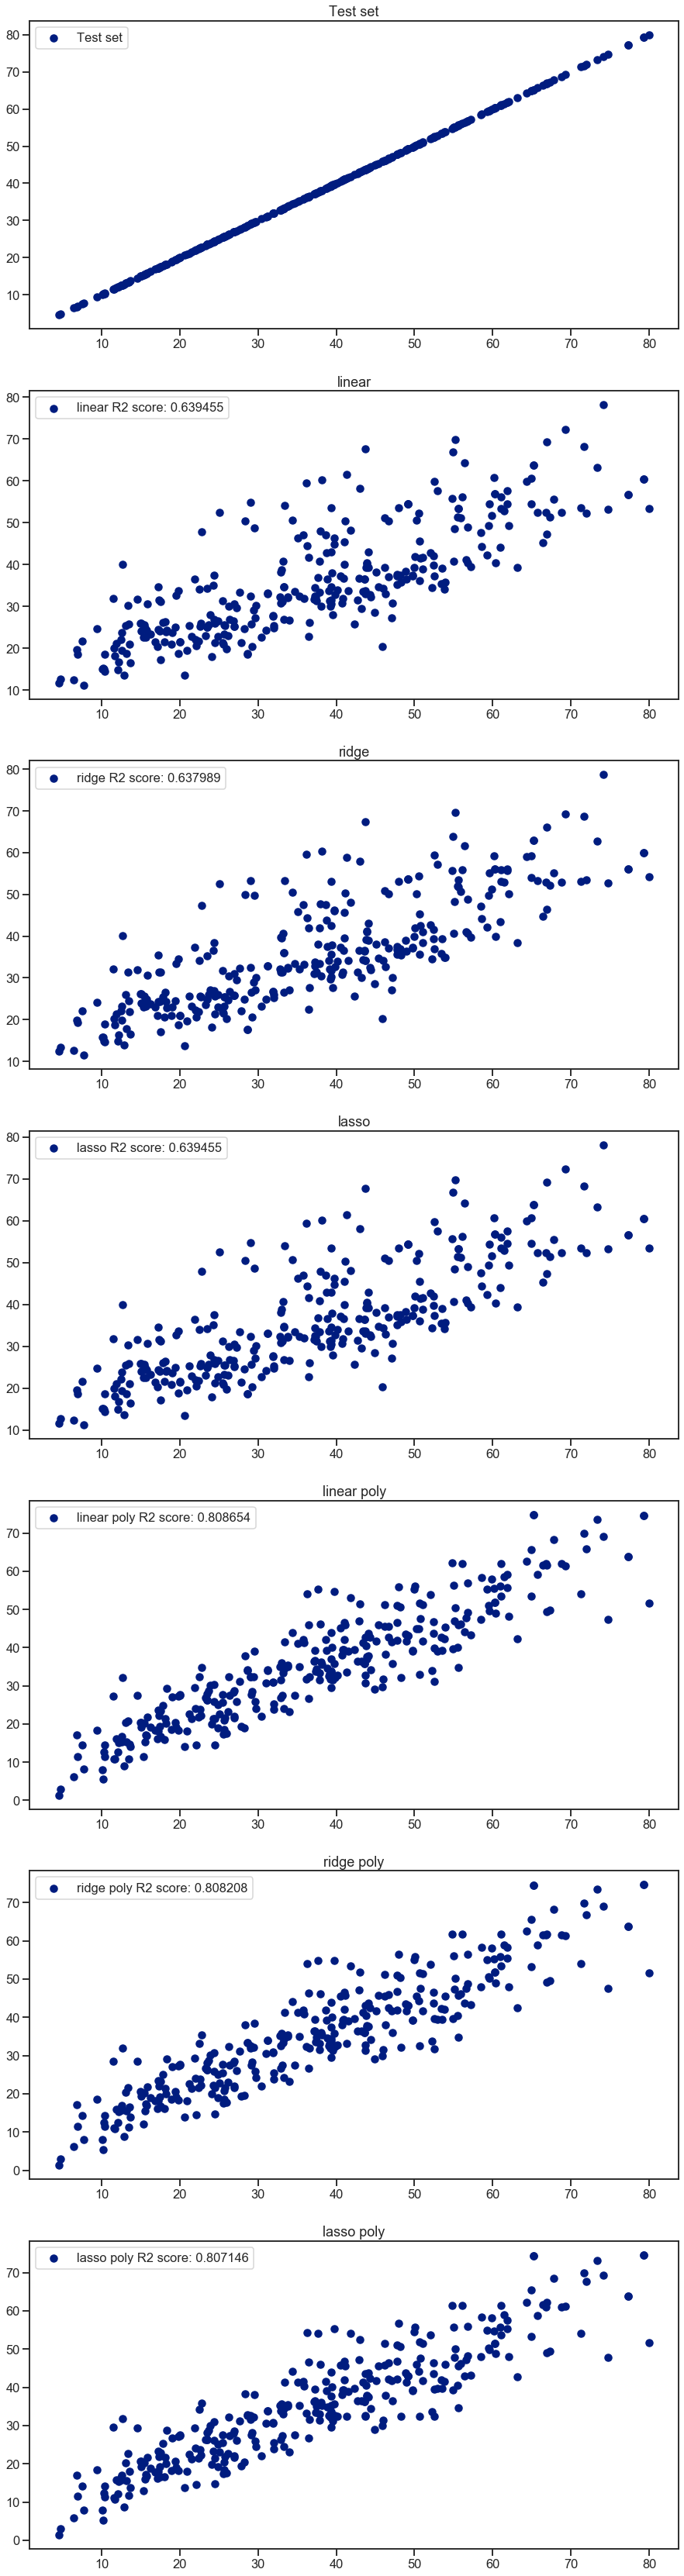

In [16]:
model.see_performance()

Coefficients for linear


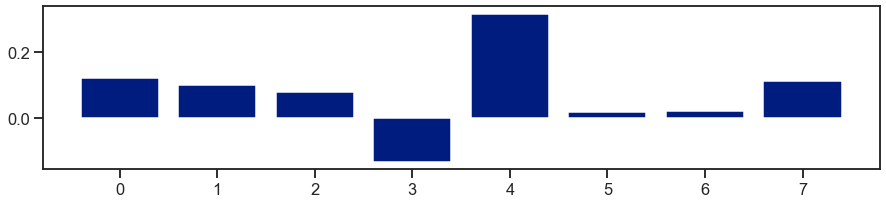

Coefficients for ridge


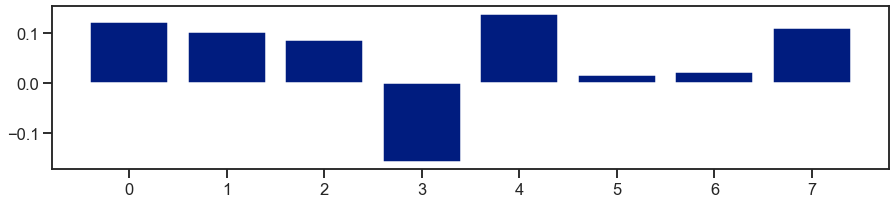

Coefficients for lasso


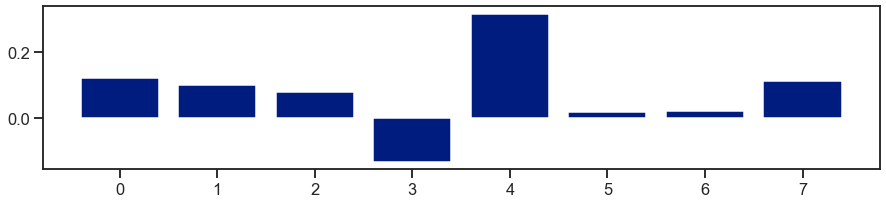

Coefficients for linear poly


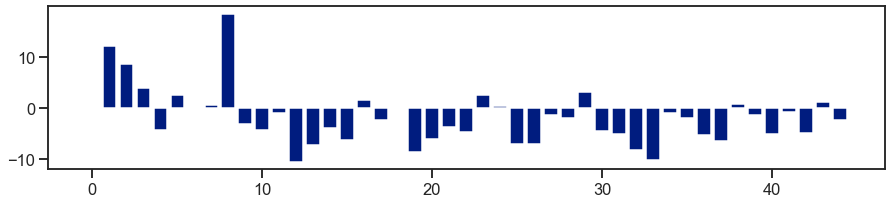

Coefficients for ridge poly


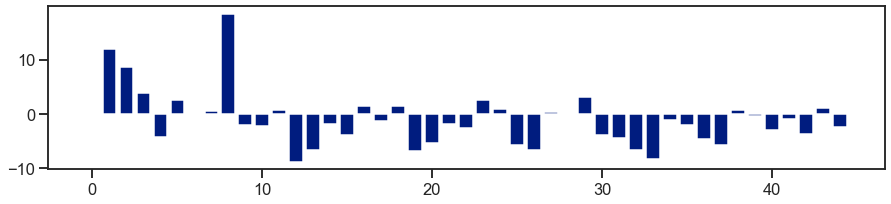

Coefficients for lasso poly


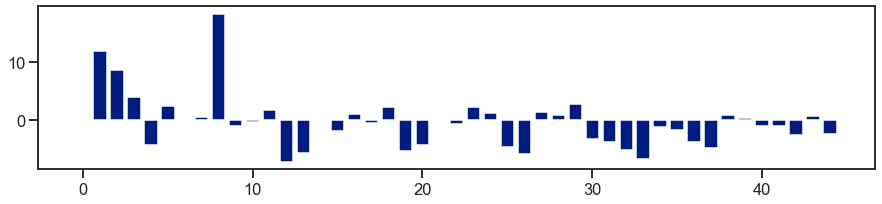

In [17]:
# See coefficients
model.check_coefficients()

__________________________________________

# ANN model

In [18]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

In [19]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [20]:
# Training the ANN on the Training set
ann.fit(model.X_train.values, model.y_train.values, batch_size = 32, epochs = 1000)

Train on 721 samples
Epoch 1/1000
721/721 [==============================] - 1s 798us/sample - loss: 1749.9220 - accuracy: 0.0000e+00
Epoch 2/1000
721/721 [==============================] - 0s 71us/sample - loss: 1282.7782 - accuracy: 0.0000e+00
Epoch 3/1000
721/721 [==============================] - 0s 62us/sample - loss: 1146.1334 - accuracy: 0.0000e+00
Epoch 4/1000
721/721 [==============================] - 0s 50us/sample - loss: 1009.4752 - accuracy: 0.0000e+00
Epoch 5/1000
721/721 [==============================] - 0s 60us/sample - loss: 825.6322 - accuracy: 0.0000e+00
Epoch 6/1000
721/721 [==============================] - 0s 61us/sample - loss: 616.5749 - accuracy: 0.0000e+00
Epoch 7/1000
721/721 [==============================] - 0s 50us/sample - loss: 508.4416 - accuracy: 0.0000e+00
Epoch 8/1000
721/721 [==============================] - 0s 47us/sample - loss: 416.7713 - accuracy: 0.0000e+00
Epoch 9/1000
721/721 [==============================] - 0s 64us/sample - loss: 347.269

Epoch 74/1000
721/721 [==============================] - 0s 69us/sample - loss: 120.4390 - accuracy: 0.0000e+00
Epoch 75/1000
721/721 [==============================] - 0s 74us/sample - loss: 118.5724 - accuracy: 0.0000e+00
Epoch 76/1000
721/721 [==============================] - 0s 57us/sample - loss: 118.8648 - accuracy: 0.0000e+00
Epoch 77/1000
721/721 [==============================] - 0s 55us/sample - loss: 118.4892 - accuracy: 0.0000e+00
Epoch 78/1000
721/721 [==============================] - 0s 47us/sample - loss: 117.7999 - accuracy: 0.0000e+00
Epoch 79/1000
721/721 [==============================] - 0s 46us/sample - loss: 118.1559 - accuracy: 0.0000e+00
Epoch 80/1000
721/721 [==============================] - 0s 49us/sample - loss: 117.2630 - accuracy: 0.0000e+00
Epoch 81/1000
721/721 [==============================] - 0s 50us/sample - loss: 117.1004 - accuracy: 0.0000e+00
Epoch 82/1000
721/721 [==============================] - 0s 51us/sample - loss: 117.3159 - accuracy: 0.0

Epoch 147/1000
721/721 [==============================] - 0s 46us/sample - loss: 81.4179 - accuracy: 0.0000e+00
Epoch 148/1000
721/721 [==============================] - 0s 47us/sample - loss: 80.5030 - accuracy: 0.0000e+00
Epoch 149/1000
721/721 [==============================] - 0s 49us/sample - loss: 80.5209 - accuracy: 0.0000e+00
Epoch 150/1000
721/721 [==============================] - 0s 47us/sample - loss: 81.6688 - accuracy: 0.0000e+00
Epoch 151/1000
721/721 [==============================] - 0s 44us/sample - loss: 79.8494 - accuracy: 0.0000e+00
Epoch 152/1000
721/721 [==============================] - 0s 44us/sample - loss: 81.8006 - accuracy: 0.0000e+00
Epoch 153/1000
721/721 [==============================] - 0s 50us/sample - loss: 80.2180 - accuracy: 0.0000e+00
Epoch 154/1000
721/721 [==============================] - 0s 65us/sample - loss: 78.8448 - accuracy: 0.0000e+00
Epoch 155/1000
721/721 [==============================] - 0s 68us/sample - loss: 80.1431 - accuracy: 0.0

721/721 [==============================] - 0s 57us/sample - loss: 63.5713 - accuracy: 0.0000e+00
Epoch 221/1000
721/721 [==============================] - 0s 49us/sample - loss: 63.1697 - accuracy: 0.0000e+00
Epoch 222/1000
721/721 [==============================] - 0s 43us/sample - loss: 62.6102 - accuracy: 0.0000e+00
Epoch 223/1000
721/721 [==============================] - 0s 44us/sample - loss: 62.5943 - accuracy: 0.0000e+00
Epoch 224/1000
721/721 [==============================] - 0s 44us/sample - loss: 64.5045 - accuracy: 0.0000e+00
Epoch 225/1000
721/721 [==============================] - 0s 44us/sample - loss: 62.5847 - accuracy: 0.0000e+00
Epoch 226/1000
721/721 [==============================] - 0s 44us/sample - loss: 62.4024 - accuracy: 0.0000e+00
Epoch 227/1000
721/721 [==============================] - 0s 49us/sample - loss: 62.2553 - accuracy: 0.0000e+00
Epoch 228/1000
721/721 [==============================] - 0s 44us/sample - loss: 61.0393 - accuracy: 0.0000e+00
Epoch 2

721/721 [==============================] - 0s 43us/sample - loss: 56.1239 - accuracy: 0.0000e+00
Epoch 294/1000
721/721 [==============================] - 0s 50us/sample - loss: 55.7219 - accuracy: 0.0000e+00
Epoch 295/1000
721/721 [==============================] - 0s 43us/sample - loss: 54.3304 - accuracy: 0.0000e+00
Epoch 296/1000
721/721 [==============================] - 0s 46us/sample - loss: 55.5612 - accuracy: 0.0000e+00
Epoch 297/1000
721/721 [==============================] - 0s 46us/sample - loss: 54.3576 - accuracy: 0.0000e+00
Epoch 298/1000
721/721 [==============================] - 0s 46us/sample - loss: 55.6090 - accuracy: 0.0000e+00
Epoch 299/1000
721/721 [==============================] - 0s 46us/sample - loss: 54.3883 - accuracy: 0.0000e+00
Epoch 300/1000
721/721 [==============================] - 0s 43us/sample - loss: 54.0263 - accuracy: 0.0000e+00
Epoch 301/1000
721/721 [==============================] - 0s 47us/sample - loss: 57.7947 - accuracy: 0.0000e+00
Epoch 3

721/721 [==============================] - 0s 51us/sample - loss: 56.3141 - accuracy: 0.0000e+00
Epoch 367/1000
721/721 [==============================] - 0s 57us/sample - loss: 54.0242 - accuracy: 0.0000e+00
Epoch 368/1000
721/721 [==============================] - 0s 49us/sample - loss: 53.1770 - accuracy: 0.0000e+00
Epoch 369/1000
721/721 [==============================] - 0s 44us/sample - loss: 53.8145 - accuracy: 0.0000e+00
Epoch 370/1000
721/721 [==============================] - 0s 47us/sample - loss: 52.0324 - accuracy: 0.0000e+00
Epoch 371/1000
721/721 [==============================] - 0s 50us/sample - loss: 52.0358 - accuracy: 0.0000e+00
Epoch 372/1000
721/721 [==============================] - 0s 62us/sample - loss: 51.7057 - accuracy: 0.0000e+00
Epoch 373/1000
721/721 [==============================] - 0s 62us/sample - loss: 53.9260 - accuracy: 0.0000e+00
Epoch 374/1000
721/721 [==============================] - 0s 67us/sample - loss: 52.8075 - accuracy: 0.0000e+00
Epoch 3

721/721 [==============================] - 0s 54us/sample - loss: 51.1076 - accuracy: 0.0000e+00
Epoch 440/1000
721/721 [==============================] - 0s 54us/sample - loss: 52.3584 - accuracy: 0.0000e+00
Epoch 441/1000
721/721 [==============================] - 0s 57us/sample - loss: 52.6842 - accuracy: 0.0000e+00
Epoch 442/1000
721/721 [==============================] - 0s 53us/sample - loss: 52.4950 - accuracy: 0.0000e+00
Epoch 443/1000
721/721 [==============================] - 0s 43us/sample - loss: 53.6477 - accuracy: 0.0000e+00
Epoch 444/1000
721/721 [==============================] - 0s 44us/sample - loss: 50.9747 - accuracy: 0.0000e+00
Epoch 445/1000
721/721 [==============================] - 0s 44us/sample - loss: 50.5106 - accuracy: 0.0000e+00
Epoch 446/1000
721/721 [==============================] - 0s 44us/sample - loss: 51.6079 - accuracy: 0.0000e+00
Epoch 447/1000
721/721 [==============================] - 0s 43us/sample - loss: 51.0592 - accuracy: 0.0000e+00
Epoch 4

721/721 [==============================] - 0s 47us/sample - loss: 51.3138 - accuracy: 0.0000e+00
Epoch 513/1000
721/721 [==============================] - 0s 50us/sample - loss: 50.2220 - accuracy: 0.0000e+00
Epoch 514/1000
721/721 [==============================] - 0s 44us/sample - loss: 50.7717 - accuracy: 0.0000e+00
Epoch 515/1000
721/721 [==============================] - 0s 49us/sample - loss: 51.5852 - accuracy: 0.0000e+00
Epoch 516/1000
721/721 [==============================] - 0s 65us/sample - loss: 53.3795 - accuracy: 0.0000e+00
Epoch 517/1000
721/721 [==============================] - 0s 72us/sample - loss: 50.6543 - accuracy: 0.0000e+00
Epoch 518/1000
721/721 [==============================] - 0s 55us/sample - loss: 51.4737 - accuracy: 0.0000e+00
Epoch 519/1000
721/721 [==============================] - 0s 54us/sample - loss: 50.2053 - accuracy: 0.0000e+00
Epoch 520/1000
721/721 [==============================] - 0s 69us/sample - loss: 50.4923 - accuracy: 0.0000e+00
Epoch 5

721/721 [==============================] - 0s 82us/sample - loss: 51.8431 - accuracy: 0.0000e+00
Epoch 586/1000
721/721 [==============================] - 0s 61us/sample - loss: 51.3565 - accuracy: 0.0000e+00
Epoch 587/1000
721/721 [==============================] - 0s 61us/sample - loss: 51.3106 - accuracy: 0.0000e+00
Epoch 588/1000
721/721 [==============================] - 0s 60us/sample - loss: 50.7970 - accuracy: 0.0000e+00
Epoch 589/1000
721/721 [==============================] - 0s 62us/sample - loss: 52.6252 - accuracy: 0.0000e+00
Epoch 590/1000
721/721 [==============================] - 0s 62us/sample - loss: 53.1487 - accuracy: 0.0000e+00
Epoch 591/1000
721/721 [==============================] - 0s 61us/sample - loss: 52.5268 - accuracy: 0.0000e+00
Epoch 592/1000
721/721 [==============================] - 0s 82us/sample - loss: 49.9945 - accuracy: 0.0000e+00
Epoch 593/1000
721/721 [==============================] - 0s 71us/sample - loss: 50.7866 - accuracy: 0.0000e+00
Epoch 5

721/721 [==============================] - 0s 46us/sample - loss: 50.3526 - accuracy: 0.0000e+00
Epoch 659/1000
721/721 [==============================] - 0s 51us/sample - loss: 50.4784 - accuracy: 0.0000e+00
Epoch 660/1000
721/721 [==============================] - 0s 46us/sample - loss: 50.2706 - accuracy: 0.0000e+00
Epoch 661/1000
721/721 [==============================] - 0s 49us/sample - loss: 49.9491 - accuracy: 0.0000e+00
Epoch 662/1000
721/721 [==============================] - 0s 44us/sample - loss: 50.2137 - accuracy: 0.0000e+00
Epoch 663/1000
721/721 [==============================] - 0s 51us/sample - loss: 50.8873 - accuracy: 0.0000e+00
Epoch 664/1000
721/721 [==============================] - 0s 42us/sample - loss: 53.6820 - accuracy: 0.0000e+00
Epoch 665/1000
721/721 [==============================] - 0s 47us/sample - loss: 51.5339 - accuracy: 0.0000e+00
Epoch 666/1000
721/721 [==============================] - 0s 49us/sample - loss: 50.5055 - accuracy: 0.0000e+00
Epoch 6

721/721 [==============================] - 0s 49us/sample - loss: 49.4325 - accuracy: 0.0000e+00
Epoch 732/1000
721/721 [==============================] - 0s 49us/sample - loss: 50.5304 - accuracy: 0.0000e+00
Epoch 733/1000
721/721 [==============================] - 0s 49us/sample - loss: 51.3545 - accuracy: 0.0000e+00
Epoch 734/1000
721/721 [==============================] - 0s 44us/sample - loss: 49.6543 - accuracy: 0.0000e+00
Epoch 735/1000
721/721 [==============================] - 0s 46us/sample - loss: 50.2353 - accuracy: 0.0000e+00
Epoch 736/1000
721/721 [==============================] - 0s 44us/sample - loss: 50.9382 - accuracy: 0.0000e+00
Epoch 737/1000
721/721 [==============================] - 0s 46us/sample - loss: 50.7002 - accuracy: 0.0000e+00
Epoch 738/1000
721/721 [==============================] - 0s 43us/sample - loss: 49.1440 - accuracy: 0.0000e+00
Epoch 739/1000
721/721 [==============================] - 0s 43us/sample - loss: 49.7209 - accuracy: 0.0000e+00
Epoch 7

721/721 [==============================] - 0s 53us/sample - loss: 51.0058 - accuracy: 0.0000e+00
Epoch 805/1000
721/721 [==============================] - 0s 49us/sample - loss: 51.0638 - accuracy: 0.0000e+00
Epoch 806/1000
721/721 [==============================] - 0s 49us/sample - loss: 49.9779 - accuracy: 0.0000e+00
Epoch 807/1000
721/721 [==============================] - 0s 51us/sample - loss: 49.6788 - accuracy: 0.0000e+00
Epoch 808/1000
721/721 [==============================] - 0s 50us/sample - loss: 48.9562 - accuracy: 0.0000e+00
Epoch 809/1000
721/721 [==============================] - 0s 44us/sample - loss: 49.2227 - accuracy: 0.0000e+00
Epoch 810/1000
721/721 [==============================] - 0s 43us/sample - loss: 49.5757 - accuracy: 0.0000e+00
Epoch 811/1000
721/721 [==============================] - 0s 51us/sample - loss: 50.8867 - accuracy: 0.0000e+00
Epoch 812/1000
721/721 [==============================] - 0s 51us/sample - loss: 49.3845 - accuracy: 0.0000e+00
Epoch 8

721/721 [==============================] - 0s 53us/sample - loss: 49.1947 - accuracy: 0.0000e+00
Epoch 878/1000
721/721 [==============================] - 0s 51us/sample - loss: 50.0408 - accuracy: 0.0000e+00
Epoch 879/1000
721/721 [==============================] - 0s 47us/sample - loss: 49.3759 - accuracy: 0.0000e+00
Epoch 880/1000
721/721 [==============================] - 0s 47us/sample - loss: 49.7601 - accuracy: 0.0000e+00
Epoch 881/1000
721/721 [==============================] - 0s 44us/sample - loss: 49.2867 - accuracy: 0.0000e+00
Epoch 882/1000
721/721 [==============================] - 0s 46us/sample - loss: 49.7787 - accuracy: 0.0000e+00
Epoch 883/1000
721/721 [==============================] - 0s 46us/sample - loss: 49.4639 - accuracy: 0.0000e+00
Epoch 884/1000
721/721 [==============================] - 0s 49us/sample - loss: 49.6740 - accuracy: 0.0000e+00
Epoch 885/1000
721/721 [==============================] - 0s 47us/sample - loss: 51.1905 - accuracy: 0.0000e+00
Epoch 8

721/721 [==============================] - 0s 50us/sample - loss: 50.4454 - accuracy: 0.0000e+00
Epoch 951/1000
721/721 [==============================] - 0s 51us/sample - loss: 49.8304 - accuracy: 0.0000e+00
Epoch 952/1000
721/721 [==============================] - 0s 51us/sample - loss: 49.8380 - accuracy: 0.0000e+00
Epoch 953/1000
721/721 [==============================] - 0s 53us/sample - loss: 52.5857 - accuracy: 0.0000e+00
Epoch 954/1000
721/721 [==============================] - 0s 50us/sample - loss: 50.9534 - accuracy: 0.0000e+00
Epoch 955/1000
721/721 [==============================] - 0s 49us/sample - loss: 49.7985 - accuracy: 0.0000e+00
Epoch 956/1000
721/721 [==============================] - 0s 53us/sample - loss: 49.5873 - accuracy: 0.0000e+00
Epoch 957/1000
721/721 [==============================] - 0s 51us/sample - loss: 49.3213 - accuracy: 0.0000e+00
Epoch 958/1000
721/721 [==============================] - 0s 53us/sample - loss: 50.3195 - accuracy: 0.0000e+00
Epoch 9

In [21]:
# Predicting the Test set results
y_pred = ann.predict(model.X_test)

In [22]:
y_pred.shape

(309, 1)

In [23]:
model.X_test.shape

(309, 8)

In [24]:
r2_score(model.y_test, y_pred)

0.839289586298415

In [25]:
rang = np.arange(len(y_pred))

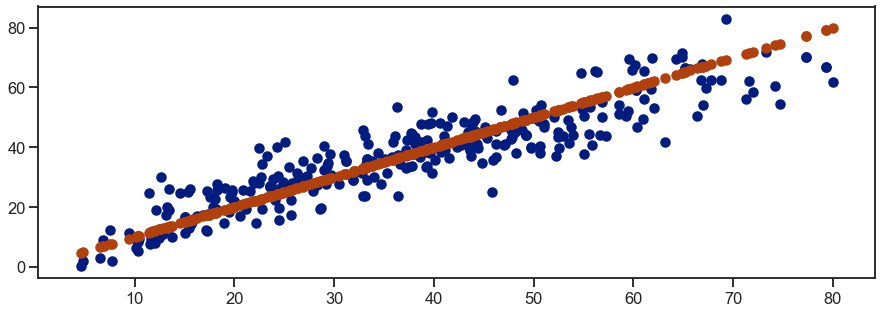

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(model.y_test, y_pred)
plt.scatter(model.y_test, model.y_test)